In [9]:
import matplotlib.pyplot as plt
import queue
"""
加载数据集  字典  key为track_id  value为[]
"""


def load_dataset():
    r1 = open('Experiment2/data/go_track_trackspoints.csv', 'r')
    r2 = open('Experiment2/data/go_track_tracks.csv', 'r')
    go_track_trackspoints = r1.readlines()
    go_track_tracks = r2.readlines()
    del (go_track_trackspoints[0])
    del (go_track_tracks[0])
    trajectory_dict = dict()
    for data in go_track_tracks:
        temp_list = data.split(',')
        points_list = []
        for j in go_track_trackspoints:
            temp_list2 = j.split(',')
            if temp_list[0] == temp_list2[3]:
                points_list.append((float(temp_list2[1]),float(temp_list2[2])))
        trajectory_dict[temp_list[0]] = points_list
    return trajectory_dict
trajectory_dict = load_dataset()

In [13]:
import numpy as np

"""
计算两个点的距离
"""
def dist(vec1, vec2):
    dist = np.sqrt(np.sum(np.square(np.array(vec1) - np.array(vec2)))) #计算欧式距离
    return dist


def tracksDist(track1,track2):
    len1 = len(track1)
    len2 = len(track2)
    step  = np.zeros([len1+1,len2 +1])
    step = step.tolist()
    for i in range(0,len1+1):
        step[i][0] = i*10
    for i in range(0, len2 + 1):
        step[0][i] = i * 10

    for i in range(0,len1):
        for j in range(0,len2):
            distance =  dist(track1[i],track2[j])
            replace = step[i][j] + distance
            insert = step[i][j + 1] + distance
            delete = step[i + 1][j] + distance
            min = 0.0
            if replace >insert:
                min = insert
            else:
                min = replace
            if delete <min:
                min = delete
            step[i + 1][j + 1] = min
    return step[len1][len2]

"""
得到邻域内所有轨迹
data: 样本点
core_point_id  核心点
radius  半径
"""
def neighbor_points(data, core_point_id, radius):
    tracks = []
    for key, value in data.items():
        #计算 每个点与核心点的距离  如果小于半径  则加入此簇
        if tracksDist(value,data[core_point_id]) < radius:
            tracks.append(key)
    return np.asarray(tracks)

import random
import queue
def dbscan(datas, radius, minPts):
    # 聚类个数
    k = 0
    # 核心对象集合
    omega = set()
    # 未访问样本集合
    not_visit = set()
    for i in datas.keys():
        not_visit.add(i)
    # 聚类结果
    cluster = dict()
    cluster_core = []
    # 遍历样本集找出所有核心对象

    for key, value in datas.items():
        # 计算以point_id为核心的点 有多少  以point_id为圆心   以radius为半径
        tracks = neighbor_points(datas, key, radius)
        if len(tracks) >= minPts:
            omega.add(key)
    #遍历核心对象的集合
    while len(omega):
        # 记录当前未访问样本集合
        not_visit_old = not_visit
        # 随机选取一个核心对象core
        core = list(omega)[random.randint(0, len(omega)-1)]
        cluster_core.append(core)
        not_visit  = not_visit - set(core)
        # 初始化队列，存放核心对象或样本
        core_deque = queue.Queue()
        core_deque.put(core)
        while not core_deque.empty():
            coreq = core_deque.get()
            # 找出以coreq邻域内的样本点
            coreq_neighborhood = neighbor_points(datas, coreq, radius)
            # 若coreq为核心对象，求其邻域内且未被访问过的样本找出
            if len(coreq_neighborhood) >= minPts:
                intersection = set()
                for i in coreq_neighborhood:
                    if i in  list(not_visit) :
                        intersection.add(i)
                #将领域内未被访问过的样本找到 加入队列  对聚类进行扩散
                for i in list(intersection):
                    core_deque.put(i)
                    #将这些点标记为已访问
                not_visit  = not_visit - intersection
        #当队列再次为空时，一个聚类已经形成

        #这个聚类内的点
        Ck = not_visit_old - not_visit
        omega = omega - Ck
        cluster[k] = list(Ck)
        k +=1
    return cluster,cluster_core
def plotRes(clusterRes,datas):

    scatterColors = ['black', 'blue', 'green', 'yellow', 'red', 'purple', 'orange', 'brown','m', 'fuchsia', 'crimson', 'dodgerblue', 'lime', 'coral', 'peru', 'khaki','black', 'blue', 'green', 'yellow', 'red', 'purple', 'orange', 'brown','m', 'fuchsia', 'crimson', 'dodgerblue', 'lime', 'coral', 'peru', 'khaki','black', 'blue', 'green', 'yellow', 'red', 'purple', 'orange', 'brown','m', 'fuchsia', 'crimson', 'dodgerblue', 'lime', 'coral', 'peru', 'khaki']
    for key in clusterRes.keys():
        for item in clusterRes[key]:
            for data in datas[item]:

                plt.scatter(data[0], data[1], c=scatterColors[key], alpha=1, marker='+')
    plt.title("DBSCAN Clustering")
    plt.show()


15条轨迹   半径0.5   minpot=2


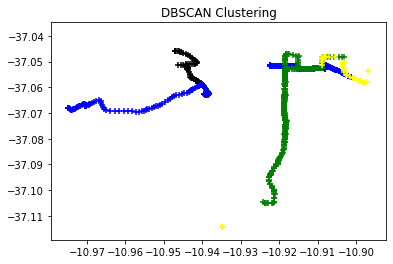

最终分为 4 个簇
簇 0 内的轨迹条数 2
簇 1 内的轨迹条数 3
簇 2 内的轨迹条数 4
簇 3 内的轨迹条数 4


In [14]:
print('15条轨迹'," ","半径0.5"," ",'minpot=2')
temp = {}
i =0
for key,value in trajectory_dict.items():
        temp[key] = value
        i+=1
        if i>15:
            break
cluster,cluster_core = dbscan(temp,0.5,2)
plotRes(cluster,temp)
print('最终分为',len(cluster.keys()),'个簇')
for i,j in cluster.items():
    print('簇',i,'内的轨迹条数',len(j))

20条轨迹   半径0.5   minpot=2


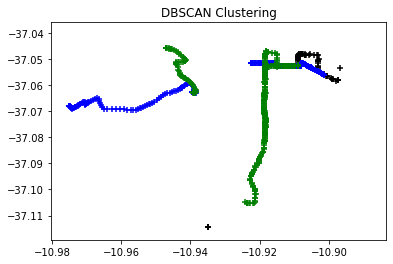

最终分为 3 个簇
簇 0 内的轨迹条数 5
簇 1 内的轨迹条数 3
簇 2 内的轨迹条数 4


In [17]:
print('20条轨迹'," ","半径0.5"," ",'minpot=2')
temp = {}
i =0
for key,value in trajectory_dict.items():
        temp[key] = value
        i+=1
        if i>20:
            break
cluster,cluster_core = dbscan(temp,0.4,2)
plotRes(cluster,temp)
print('最终分为',len(cluster.keys()),'个簇')
for i,j in cluster.items():
    print('簇',i,'内的轨迹条数',len(j))

30条轨迹   半径0.4   minpot=2


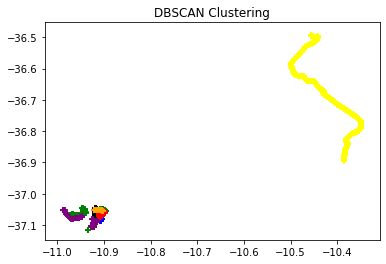

最终分为 7 个簇
簇 0 内的轨迹条数 5
簇 1 内的轨迹条数 2
簇 2 内的轨迹条数 7
簇 3 内的轨迹条数 2
簇 4 内的轨迹条数 4
簇 5 内的轨迹条数 2
簇 6 内的轨迹条数 2


In [18]:
print('30条轨迹'," ","半径0.4"," ",'minpot=2')
temp = {}
i =0
for key,value in trajectory_dict.items():
        temp[key] = value
        i+=1
        if i>30:
            break
cluster,cluster_core = dbscan(temp,0.4,2)
plotRes(cluster,temp)
print('最终分为',len(cluster.keys()),'个簇')
for i,j in cluster.items():
    print('簇',i,'内的轨迹条数',len(j))

20条轨迹   半径0.5   minpot=1


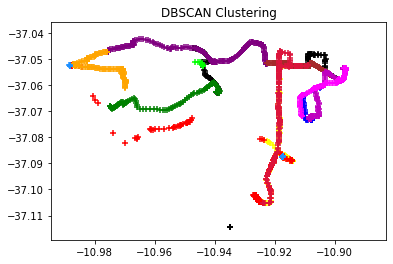

最终分为 13 个簇
簇 0 内的轨迹条数 6
簇 1 内的轨迹条数 1
簇 2 内的轨迹条数 1
簇 3 内的轨迹条数 2
簇 4 内的轨迹条数 1
簇 5 内的轨迹条数 1
簇 6 内的轨迹条数 1
簇 7 内的轨迹条数 2
簇 8 内的轨迹条数 1
簇 9 内的轨迹条数 1
簇 10 内的轨迹条数 2
簇 11 内的轨迹条数 1
簇 12 内的轨迹条数 1


In [24]:
print('20条轨迹'," ","半径0.5"," ",'minpot=1')
temp = {}
i =0
for key,value in trajectory_dict.items():
        temp[key] = value
        i+=1
        if i>20:
            break
cluster,cluster_core = dbscan(temp,0.5,1)
plotRes(cluster,temp)
print('最终分为',len(cluster.keys()),'个簇')
for i,j in cluster.items():
    print('簇',i,'内的轨迹条数',len(j))